In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
from sklearn.cluster import KMeans
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import warnings
warnings.filterwarnings("ignore")

In [198]:
df = pd.read_csv('Mall_Customers (1).csv',index_col='CustomerID')
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


### Exploring Data

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [201]:
df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

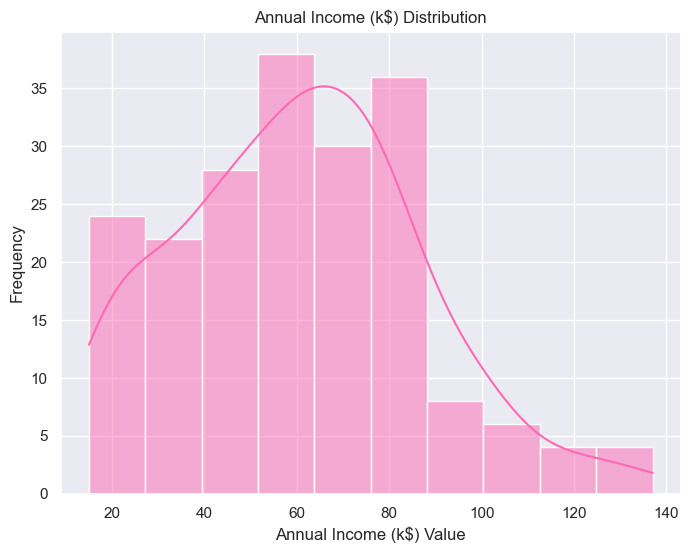

In [202]:
plt.figure(figsize=(8,6))
sns.histplot(df['Annual Income (k$)'],kde=True,color='hotpink')
plt.title('Annual Income (k$) Distribution')
plt.xlabel('Annual Income (k$) Value')
plt.ylabel('Frequency')
plt.show()

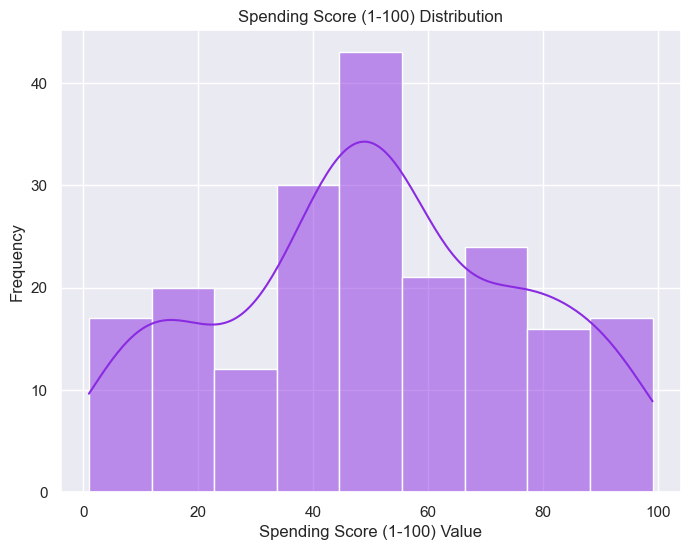

In [203]:
plt.figure(figsize=(8,6))
sns.histplot(df['Spending Score (1-100)'],kde=True,color='blueviolet')
plt.title('Spending Score (1-100) Distribution')
plt.xlabel('Spending Score (1-100) Value')
plt.ylabel('Frequency')
plt.show()

#### Make sure data has no outliers

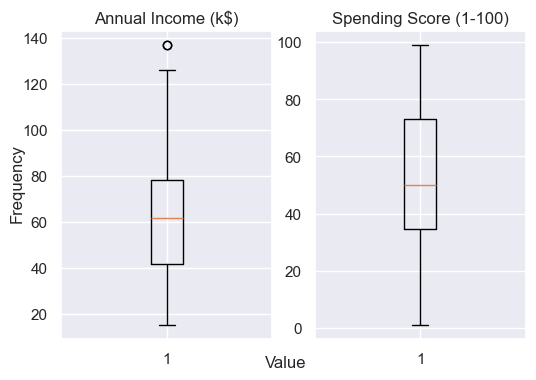

In [205]:
fig,(axes_1 , axes_2) = plt.subplots(1,2,figsize = (6,4))
axes_1.set_title('Annual Income (k$)')
axes_1.boxplot(df['Annual Income (k$)'])

axes_2.set_title('Spending Score (1-100)')
axes_2.boxplot(df['Spending Score (1-100)'])
fig.text(0.5, 0.04, 'Value', ha='center') 

fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')
plt.show()

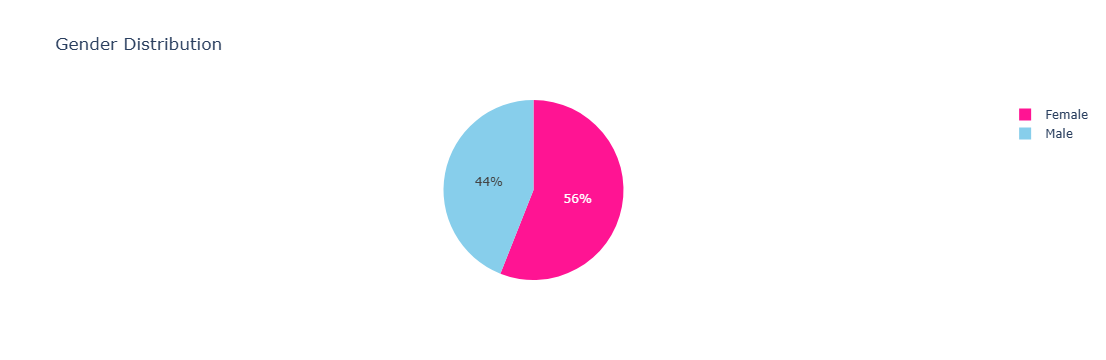

In [206]:
fig = px.pie(df, names='Gender', color='Gender',
             color_discrete_sequence=['skyblue', 'deeppink'],
             title='Gender Distribution') 
iplot(fig)

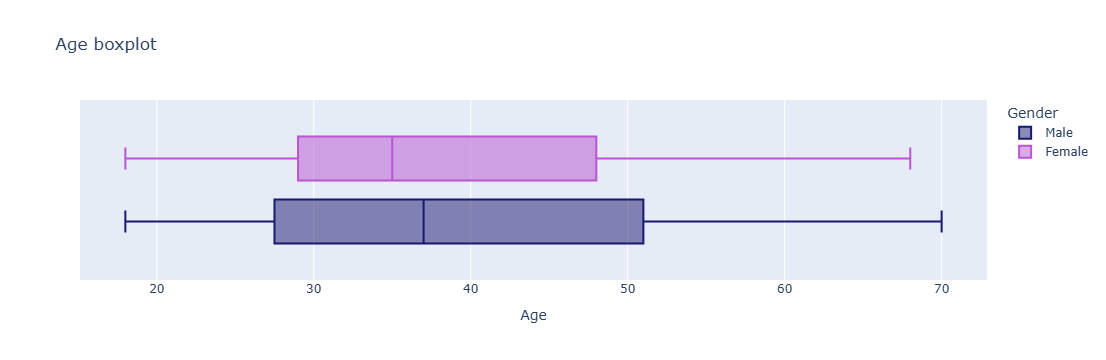

In [327]:
fig = px.box(df,'Age',title = 'Age boxplot',color='Gender',color_discrete_sequence=['midnightblue','mediumorchid'])
iplot(fig)

<div style="
    background-color: #e0f7fa;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Results on the Analysis
</div>

### Summary of Data Statistics

#### Age:
- **Minimum Age**: 
  - Males: 18
  - Females: 18
- **Maximum Age**: 
  - Males: 70
  - Females: 68
- **Average Age**: 
  - Males: 39
  - Females: 38

#### Annual Income:
- **Minimum Annual Income**: 15K
- **Maximum Annual Income**: 137K
- **Average Annual Income**: 60K
- **Distribution of Annual Income**: 55K to 82K

#### Spending Score:
- **Minimum Spending Score**: 1
- **Maximum Spending Score**: 99
- **Average Spending Score**: 50
- **Distribution of Spending Score**: 40 to 60

#### Gender Distribution:
- **Male**: 44%
- **Female**: 56%ng 40-60 score

<div style="
    background-color: #ffecb3;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #333;
">
    Building the K-Means Model
</div>


In [211]:
data = df.loc[:,['Annual Income (k$)','Spending Score (1-100)']].values
data

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

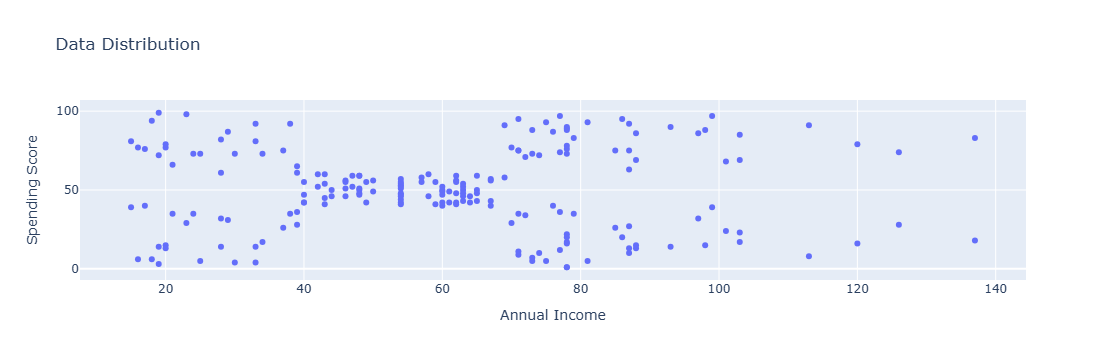

In [253]:
fig = px.scatter(x=data[:,0],y=data[:,1],title = 'Data Distribution')
fig.update_layout(
    xaxis_title = 'Annual Income',
    yaxis_title = 'Spending Score'
)
iplot(fig)

#### Applying the (Elbow/knee) Method

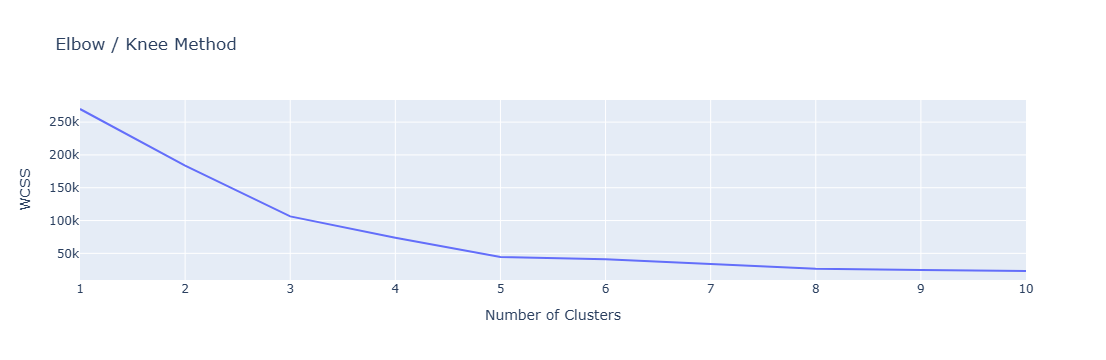

In [259]:
WCSS = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)


fig= px.line(x= range(1,11),y = WCSS,title='Elbow / Knee Method')
fig.update_layout(
    xaxis_title = 'Number of Clusters',
    yaxis_title  = 'WCSS'
 ) 
iplot(fig)

### From Elbow Method we decide #of clusters = 5 

In [263]:
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
kmeans.fit(data)

KMeans(n_clusters=5, random_state=42)

In [265]:
kmeans.cluster_centers_

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348]])

In [267]:
kmeans.inertia_

44448.45544793371

In [273]:
df['Clusters'] = kmeans.predict(data)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,4
2,Male,21,15,81,2
3,Female,20,16,6,4
4,Female,23,16,77,2
5,Female,31,17,40,4


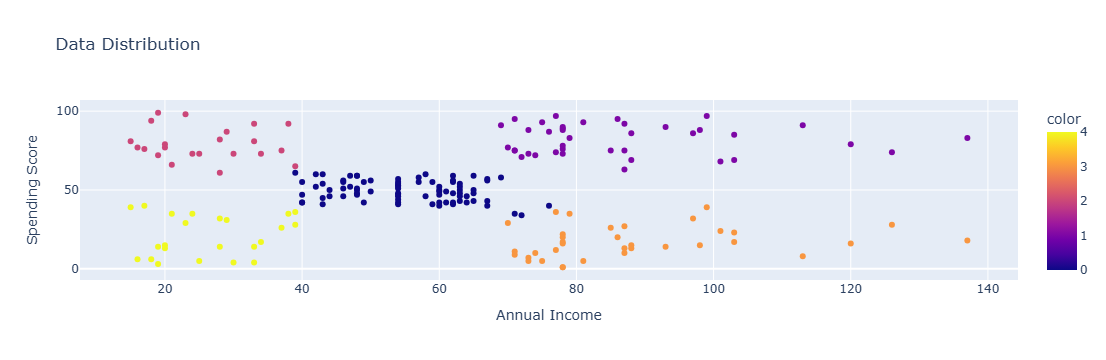

In [279]:
fig = px.scatter(x=data[:,0],y=data[:,1],title = 'Data Distribution',color=df['Clusters'])
fig.update_layout(
    xaxis_title = 'Annual Income',
    yaxis_title = 'Spending Score'
)
iplot(fig)

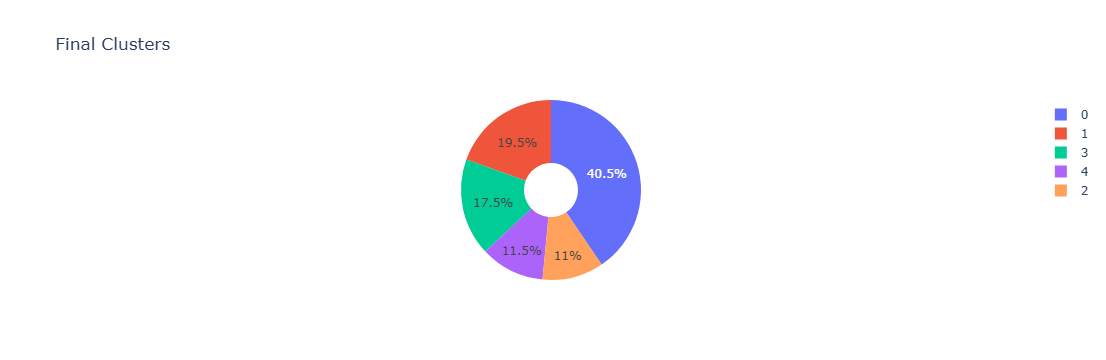

In [315]:
fig = px.pie(df,names='Clusters',title='Final Clusters',hole=.30,opacity=1)
iplot(fig)

<div style="
    background-color: #D4AF37;
    border-radius: 20px;
    padding: 15px;
    text-align: center;
    font-size: 24px;
    font-weight: bold;
    color: #220;
">
    Thank You <3
</div>